In [1]:
import pandas as pd

In [2]:
df_d2_couv= pd.read_csv('../raw_data/export_d2.csv')
df_d16_couv= pd.read_csv('../raw_data/export_d16.csv')

In [3]:
df_d2_preproc=pd.read_csv('../raw_data/preproc_data_d2.csv')
df_d16_preproc=pd.read_csv('../raw_data/preproc_data_d16.csv')


df_d2_preproc['date'] = pd.to_datetime(df_d2_preproc['date'],  format='%Y-%m-%d')
df_d16_preproc['date'] = pd.to_datetime(df_d16_preproc['date'],  format='%Y-%m-%d')

In [4]:
def preprocess_couv(df):
    
    df = df.drop(columns='Restaurant')
    df['Jour'] = pd.to_datetime(df['Jour'],  format='%Y-%m-%d')
    df = df[(df['Jour'] >= "2019-01-01") & (df['Jour'] <= "2021-07-31")]
    df = df.sort_values(by='Jour').reset_index(drop=True)
    df = df.rename(columns={"Jour": "date", "Service": "service", 'Nombre de Réservations': 'nb_resa', 'Nombre de couverts réservation': 'nb_couverts_resa',
                            'Nombre de Passages': 'nb_passage', 'Nombre de couverts passage': 'nb_couverts_passage',
                     'Nombre de couverts total':'total_couverts', 'Délai en jour entre la prise de résa et le jour de résa':'temps_resa'})
    for i in range(len(df)):
        if df['service'][i]=='Diner - ':
             df['service'][i] = 'soir'
        elif df['service'][i]=='Dîner':
             df['service'][i] = 'soir'
        elif df['service'][i]=='Dîner - ':
             df['service'][i] = 'soir'
        elif df['service'][i]=='Diner - 2ème service':
             df['service'][i] = 'soir'
        elif df['service'][i]=='Diner jo':
             df['service'][i] = 'soir'
        elif df['service'][i]=='DINER JO':
             df['service'][i] = 'soir'
        elif df['service'][i]=='Déjeuner':
             df['service'][i] = 'midi'
        elif df['service'][i]=='Dejeuner':
             df['service'][i] = 'midi'
        elif df['service'][i]=='Dejeuner week-end':
             df['service'][i] = 'midi'
        
    df=df.drop(df.loc[df['total_couverts']<=10].index)
    df=df.drop(columns=['nb_resa','nb_couverts_resa','nb_passage','nb_couverts_passage','temps_resa'])
        

    return df

In [5]:
 df_d2_couv_preproc=preprocess_couv(df_d2_couv)

/var/folders/d8/q33dfdgd07x2w3h7hz0ly4y00000gn/T/ipykernel_27434/793125363.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['service'][i] = 'soir'
/var/folders/d8/q33dfdgd07x2w3h7hz0ly4y00000gn/T/ipykernel_27434/793125363.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['service'][i] = 'midi'
/var/folders/d8/q33dfdgd07x2w3h7hz0ly4y00000gn/T/ipykernel_27434/793125363.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

In [6]:
 df_d16_couv_preproc=preprocess_couv(df_d16_couv)

/var/folders/d8/q33dfdgd07x2w3h7hz0ly4y00000gn/T/ipykernel_27434/793125363.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['service'][i] = 'soir'
/var/folders/d8/q33dfdgd07x2w3h7hz0ly4y00000gn/T/ipykernel_27434/793125363.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['service'][i] = 'midi'
/var/folders/d8/q33dfdgd07x2w3h7hz0ly4y00000gn/T/ipykernel_27434/793125363.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

In [7]:
df_d2_couv_preproc.head(10)

,date,service,total_couverts
0,2019-01-01,soir,248
1,2019-01-02,midi,105
2,2019-01-02,soir,238
3,2019-01-03,midi,149
4,2019-01-03,soir,238
5,2019-01-04,midi,160
6,2019-01-04,soir,281
7,2019-01-05,midi,144
8,2019-01-05,soir,293
9,2019-01-06,midi,125


In [8]:
 df_d16_couv_preproc.head(10)

,date,service,total_couverts
0,2019-08-28,soir,86
1,2019-08-29,soir,110
2,2019-08-30,soir,147
3,2019-08-31,soir,149
4,2019-09-01,soir,108
5,2019-09-01,midi,113
6,2019-09-02,midi,72
8,2019-09-02,soir,105
10,2019-09-03,midi,42
11,2019-09-03,soir,173


In [9]:
df_d2_couv_preproc['service'].unique()

array(['soir', 'midi', nan], dtype=object)

In [10]:
 df_d16_couv_preproc['service'].unique()

array(['soir', 'midi', nan], dtype=object)

In [11]:
len(df_d2_couv_preproc.loc[df_d2_couv_preproc.isnull().any(axis=1)])

28

In [12]:
df_d16_couv_preproc.loc[df_d16_couv_preproc.isnull().any(axis=1)]

,date,service,total_couverts
116,2020-06-24,NaN,12
131,2020-06-29,NaN,40
169,2020-07-14,NaN,14
189,2020-07-22,NaN,20
267,2020-09-07,NaN,16
274,2020-09-10,NaN,21
275,2020-09-11,NaN,12
286,2020-09-15,NaN,12
349,2020-10-11,NaN,145
366,2020-10-18,NaN,32


In [13]:
preproc_merged_d2 = df_d2_couv_preproc.merge(df_d2_preproc, how='inner', left_on=['date','service'],right_on=['date','service'])

In [14]:
preproc_merged_d2

,date,service,total_couverts,jour,CA_TTC,moyen_7_services,moyen_31_services,moyenne_3der_j&service,temp,feels_like,...,cos_jour_de_sem,sin_jour_de_sem,cos_jour_du_mois,sin_jour_du_mois,cos_mois_de_annee,sin_mois_de_annee,cos_jour_annee,sin_jour_annee,cos_semaine_annee,sin_semaine_annee
0,2019-01-01,soir,248,Mardi,8345.0,0.000000,0.000000,0.00,280.87,280.87,...,-0.222521,0.974928,0.979530,2.012985e-01,0.866025,0.5,0.999852,0.017213,0.992709,0.120537
1,2019-01-02,midi,105,Mercredi,3939.0,0.000000,0.000000,0.00,279.57,278.92,...,-0.900969,0.433884,0.918958,3.943559e-01,0.866025,0.5,0.999407,0.034422,0.992709,0.120537
2,2019-01-02,soir,238,Mercredi,9045.5,0.000000,0.000000,0.00,278.95,277.22,...,-0.900969,0.433884,0.918958,3.943559e-01,0.866025,0.5,0.999407,0.034422,0.992709,0.120537
3,2019-01-03,midi,149,Jeudi,4836.0,0.000000,0.000000,0.00,279.11,279.11,...,-0.900969,-0.433884,0.820763,5.712682e-01,0.866025,0.5,0.998667,0.051620,0.992709,0.120537
4,2019-01-03,soir,238,Jeudi,10024.0,0.000000,0.000000,0.00,278.57,278.57,...,-0.900969,-0.433884,0.820763,5.712682e-01,0.866025,0.5,0.998667,0.051620,0.992709,0.120537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,2021-07-29,soir,154,Jeudi,7230.0,7909.714286,8088.625806,8803.83,295.25,294.82,...,-0.900969,-0.433884,0.918958,-3.943559e-01,-0.866025,-0.5,-0.890028,-0.455907,-0.885456,-0.464723
1228,2021-07-30,midi,72,Vendredi,2104.0,2849.357143,3314.595484,3076.17,295.70,295.29,...,-0.222521,-0.974928,0.979530,-2.012985e-01,-0.866025,-0.5,-0.882048,-0.471160,-0.885456,-0.464723
1229,2021-07-30,soir,167,Vendredi,9816.5,7880.642857,8008.254839,8632.17,294.44,294.01,...,-0.222521,-0.974928,0.979530,-2.012985e-01,-0.866025,-0.5,-0.882048,-0.471160,-0.885456,-0.464723
1230,2021-07-31,midi,25,Samedi,1202.5,2846.428571,3108.821290,3432.42,294.69,294.47,...,0.623490,-0.781831,1.000000,-2.449294e-16,-0.866025,-0.5,-0.873807,-0.486273,-0.885456,-0.464723


In [15]:
preproc_merged_d16 = df_d16_couv_preproc.merge(df_d16_preproc, how='inner', left_on=['date','service'],right_on=['date','service'])

In [16]:
preproc_merged_d16

,date,service,total_couverts,jour,CA_TTC,moyen_7_services,moyen_31_services,moyenne_3der_j&service,temp,feels_like,...,cos_jour_de_sem,sin_jour_de_sem,cos_jour_du_mois,sin_jour_du_mois,cos_mois_de_annee,sin_mois_de_annee,cos_jour_annee,sin_jour_annee,cos_semaine_annee,sin_semaine_annee
0,2019-09-01,soir,108,Dimanche,4577.10,0.000000,0.000000,0.00,293.37,292.60,...,1.000000,-2.449294e-16,0.979530,2.012985e-01,-1.836970e-16,-1.0,-0.490029,-0.871706,-0.464723,-0.885456
1,2019-09-01,midi,113,Dimanche,3548.00,0.000000,0.000000,0.00,294.08,293.35,...,1.000000,-2.449294e-16,0.979530,2.012985e-01,-1.836970e-16,-1.0,-0.490029,-0.871706,-0.464723,-0.885456
2,2019-09-02,midi,72,Lundi,2089.00,0.000000,0.000000,0.00,294.26,293.47,...,0.623490,7.818315e-01,0.918958,3.943559e-01,-1.836970e-16,-1.0,-0.474951,-0.880012,-0.354605,-0.935016
3,2019-09-02,soir,105,Lundi,5726.50,0.000000,0.000000,0.00,294.00,293.08,...,0.623490,7.818315e-01,0.918958,3.943559e-01,-1.836970e-16,-1.0,-0.474951,-0.880012,-0.354605,-0.935016
4,2019-09-03,midi,42,Mardi,1745.25,0.000000,0.000000,0.00,295.07,294.57,...,-0.222521,9.749279e-01,0.820763,5.712682e-01,-1.836970e-16,-1.0,-0.459733,-0.888057,-0.354605,-0.935016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,2021-07-29,soir,169,Jeudi,6564.00,7226.850000,7727.884839,8675.33,295.25,294.82,...,-0.900969,-4.338837e-01,0.918958,-3.943559e-01,-8.660254e-01,-0.5,-0.890028,-0.455907,-0.885456,-0.464723
382,2021-07-30,midi,36,Vendredi,1361.00,2473.185714,2941.614516,2583.67,295.70,295.29,...,-0.222521,-9.749279e-01,0.979530,-2.012985e-01,-8.660254e-01,-0.5,-0.882048,-0.471160,-0.885456,-0.464723
383,2021-07-30,soir,163,Vendredi,7058.00,7071.564286,7822.755806,8488.83,294.44,294.01,...,-0.222521,-9.749279e-01,0.979530,-2.012985e-01,-8.660254e-01,-0.5,-0.882048,-0.471160,-0.885456,-0.464723
384,2021-07-31,midi,51,Samedi,1655.50,2311.257143,2890.146774,2967.67,294.69,294.47,...,0.623490,-7.818315e-01,1.000000,-2.449294e-16,-8.660254e-01,-0.5,-0.873807,-0.486273,-0.885456,-0.464723


In [17]:
#preproc_merged_d2=preproc_merged_d2.drop(columns='CA_TTC')
#preproc_merged_d16=preproc_merged_d16.drop(columns='CA_TTC')

In [18]:
preproc_merged_d2

,date,service,total_couverts,jour,CA_TTC,moyen_7_services,moyen_31_services,moyenne_3der_j&service,temp,feels_like,...,cos_jour_de_sem,sin_jour_de_sem,cos_jour_du_mois,sin_jour_du_mois,cos_mois_de_annee,sin_mois_de_annee,cos_jour_annee,sin_jour_annee,cos_semaine_annee,sin_semaine_annee
0,2019-01-01,soir,248,Mardi,8345.0,0.000000,0.000000,0.00,280.87,280.87,...,-0.222521,0.974928,0.979530,2.012985e-01,0.866025,0.5,0.999852,0.017213,0.992709,0.120537
1,2019-01-02,midi,105,Mercredi,3939.0,0.000000,0.000000,0.00,279.57,278.92,...,-0.900969,0.433884,0.918958,3.943559e-01,0.866025,0.5,0.999407,0.034422,0.992709,0.120537
2,2019-01-02,soir,238,Mercredi,9045.5,0.000000,0.000000,0.00,278.95,277.22,...,-0.900969,0.433884,0.918958,3.943559e-01,0.866025,0.5,0.999407,0.034422,0.992709,0.120537
3,2019-01-03,midi,149,Jeudi,4836.0,0.000000,0.000000,0.00,279.11,279.11,...,-0.900969,-0.433884,0.820763,5.712682e-01,0.866025,0.5,0.998667,0.051620,0.992709,0.120537
4,2019-01-03,soir,238,Jeudi,10024.0,0.000000,0.000000,0.00,278.57,278.57,...,-0.900969,-0.433884,0.820763,5.712682e-01,0.866025,0.5,0.998667,0.051620,0.992709,0.120537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,2021-07-29,soir,154,Jeudi,7230.0,7909.714286,8088.625806,8803.83,295.25,294.82,...,-0.900969,-0.433884,0.918958,-3.943559e-01,-0.866025,-0.5,-0.890028,-0.455907,-0.885456,-0.464723
1228,2021-07-30,midi,72,Vendredi,2104.0,2849.357143,3314.595484,3076.17,295.70,295.29,...,-0.222521,-0.974928,0.979530,-2.012985e-01,-0.866025,-0.5,-0.882048,-0.471160,-0.885456,-0.464723
1229,2021-07-30,soir,167,Vendredi,9816.5,7880.642857,8008.254839,8632.17,294.44,294.01,...,-0.222521,-0.974928,0.979530,-2.012985e-01,-0.866025,-0.5,-0.882048,-0.471160,-0.885456,-0.464723
1230,2021-07-31,midi,25,Samedi,1202.5,2846.428571,3108.821290,3432.42,294.69,294.47,...,0.623490,-0.781831,1.000000,-2.449294e-16,-0.866025,-0.5,-0.873807,-0.486273,-0.885456,-0.464723


In [19]:
preproc_merged_d16

,date,service,total_couverts,jour,CA_TTC,moyen_7_services,moyen_31_services,moyenne_3der_j&service,temp,feels_like,...,cos_jour_de_sem,sin_jour_de_sem,cos_jour_du_mois,sin_jour_du_mois,cos_mois_de_annee,sin_mois_de_annee,cos_jour_annee,sin_jour_annee,cos_semaine_annee,sin_semaine_annee
0,2019-09-01,soir,108,Dimanche,4577.10,0.000000,0.000000,0.00,293.37,292.60,...,1.000000,-2.449294e-16,0.979530,2.012985e-01,-1.836970e-16,-1.0,-0.490029,-0.871706,-0.464723,-0.885456
1,2019-09-01,midi,113,Dimanche,3548.00,0.000000,0.000000,0.00,294.08,293.35,...,1.000000,-2.449294e-16,0.979530,2.012985e-01,-1.836970e-16,-1.0,-0.490029,-0.871706,-0.464723,-0.885456
2,2019-09-02,midi,72,Lundi,2089.00,0.000000,0.000000,0.00,294.26,293.47,...,0.623490,7.818315e-01,0.918958,3.943559e-01,-1.836970e-16,-1.0,-0.474951,-0.880012,-0.354605,-0.935016
3,2019-09-02,soir,105,Lundi,5726.50,0.000000,0.000000,0.00,294.00,293.08,...,0.623490,7.818315e-01,0.918958,3.943559e-01,-1.836970e-16,-1.0,-0.474951,-0.880012,-0.354605,-0.935016
4,2019-09-03,midi,42,Mardi,1745.25,0.000000,0.000000,0.00,295.07,294.57,...,-0.222521,9.749279e-01,0.820763,5.712682e-01,-1.836970e-16,-1.0,-0.459733,-0.888057,-0.354605,-0.935016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,2021-07-29,soir,169,Jeudi,6564.00,7226.850000,7727.884839,8675.33,295.25,294.82,...,-0.900969,-4.338837e-01,0.918958,-3.943559e-01,-8.660254e-01,-0.5,-0.890028,-0.455907,-0.885456,-0.464723
382,2021-07-30,midi,36,Vendredi,1361.00,2473.185714,2941.614516,2583.67,295.70,295.29,...,-0.222521,-9.749279e-01,0.979530,-2.012985e-01,-8.660254e-01,-0.5,-0.882048,-0.471160,-0.885456,-0.464723
383,2021-07-30,soir,163,Vendredi,7058.00,7071.564286,7822.755806,8488.83,294.44,294.01,...,-0.222521,-9.749279e-01,0.979530,-2.012985e-01,-8.660254e-01,-0.5,-0.882048,-0.471160,-0.885456,-0.464723
384,2021-07-31,midi,51,Samedi,1655.50,2311.257143,2890.146774,2967.67,294.69,294.47,...,0.623490,-7.818315e-01,1.000000,-2.449294e-16,-8.660254e-01,-0.5,-0.873807,-0.486273,-0.885456,-0.464723


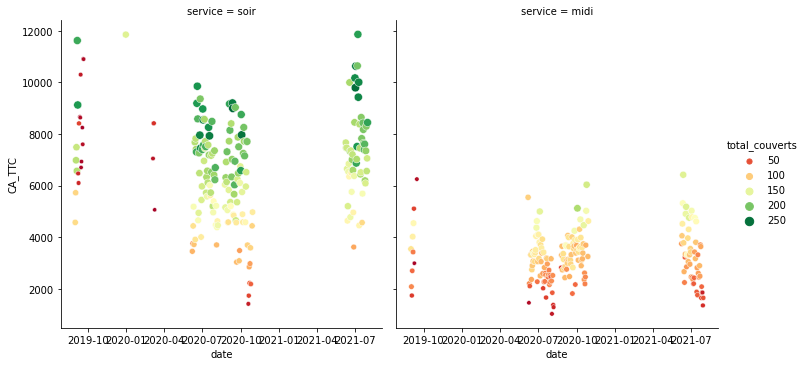

In [25]:
import seaborn as sns
sns.relplot(
    data=preproc_merged_d16, x="date", y="CA_TTC",
    col="service", hue="total_couverts",size='total_couverts',
    kind="scatter",palette='RdYlGn'
);

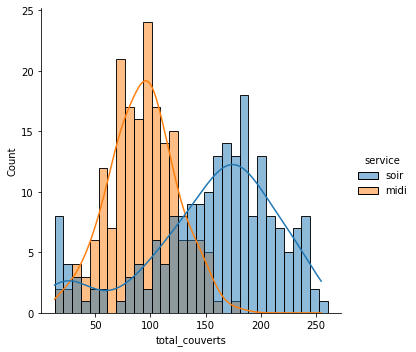

In [24]:
ax=sns.displot(data=preproc_merged_d16, x="total_couverts",binwidth=8,hue='service',kde=True)

<AxesSubplot:>

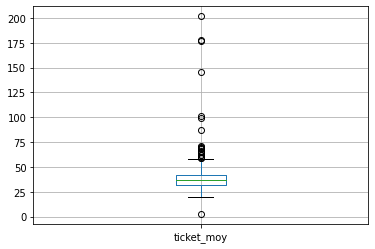

In [36]:
preproc_merged_d2['ticket_moy']=preproc_merged_d2['CA_TTC']/preproc_merged_d2['total_couverts']
preproc_merged_d2[['ticket_moy']].boxplot()

In [34]:
#sns.displot(data=preproc_merged_d2, x="ticket_moy",hue='service',kde=True)

In [33]:
#sns.catplot( y='ticket_moy', data=preproc_merged_d2.loc[preproc_merged_d2['service']=='midi'], kind="box");

In [44]:
preproc_merged_d2=preproc_merged_d2.loc[(preproc_merged_d2['ticket_moy']<75) & (preproc_merged_d2['ticket_moy']>15)]

<AxesSubplot:>

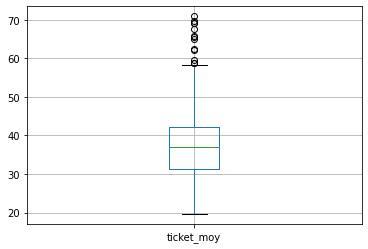